<a href="https://colab.research.google.com/github/shubhamraut0209/Personal-Projects-Portfolio/blob/main/Market_Basket_Analysis_on_Online_Retail_II_dataset_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE:- MARKET BASKET ANALYSIS ON ONLINE RETAIL II DATASET USING R**

**Step-1: Introduction**

Objective

> The primary objective of this project is to analyze Customer Purchase Behaviour for the UK-based non-store online retail business over a two-year period,with the goal of identifying frequent itemsets and association rules to improve product placement and marketing strategies .



Dataset Description

*   Name:-  Online Retail II
*   Period:-  01/12/2009 to 09/12/2011
*   Description:-  This dataset contains all the transcations for a UK-based and registered non-store online retail company that primarily sells unique all occassion gift-ware. Many customers are wholesalers .





**Step-2:Data Preprocessing**

Installing and Loading necessary libraries

In [ ]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("arulesViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readxl)
library(dplyr)
library(arules)

In [ ]:
library(arulesViz)

Loading data from both sheets of Online Retail 2 dataset

In [ ]:
retail_2009_2010=read_excel("/content/online_retail_II.xlsx",sheet="Year 2009-2010")
retail_2010_2011=read_excel("/content/online_retail_II.xlsx",sheet="Year 2010-2011")

Combining the datasets

In [ ]:
online_retail_ii=bind_rows(retail_2009_2010, retail_2010_2011)

Initial Exploration

In [ ]:
head(online_retail_ii,5)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [ ]:
summary(online_retail_ii)

   Invoice           StockCode         Description           Quantity        
 Length:1067371     Length:1067371     Length:1067371     Min.   :-80995.00  
 Class :character   Class :character   Class :character   1st Qu.:     1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :     3.00  
                                                          Mean   :     9.94  
                                                          3rd Qu.:    10.00  
                                                          Max.   : 80995.00  
                                                                             
  InvoiceDate                         Price            Customer ID    
 Min.   :2009-12-01 07:45:00.00   Min.   :-53594.36   Min.   :12346   
 1st Qu.:2010-07-09 09:46:00.00   1st Qu.:     1.25   1st Qu.:13975   
 Median :2010-12-07 15:28:00.00   Median :     2.10   Median :15255   
 Mean   :2011-01-02 21:13:55.39   Mean   :     4.65   Mean   :15325   
 3rd Qu.:2011-07-22 1

Data Cleaning

In [ ]:
online_retail_ii=na.omit(online_retail_ii) # Remove missing values

In [ ]:
online_retail_ii=online_retail_ii[online_retail_ii$Quantity>0, ] # Filter positive quantities

In [ ]:
online_retail_ii=online_retail_ii[online_retail_ii$Price>0, ] # Filter positive prices

Data Transformation

In [ ]:
transcations_ii=online_retail_ii %>% group_by(Invoice) %>% summarise(Items=paste(Description, collapse=","))

In [ ]:
transcations_split_ii=strsplit(transcations_ii$Items, ",")

In [ ]:
transcations_df=data.frame(Invoice=rep(transcations_ii$Invoice,sapply(transcations_split_ii,length)),Items=unlist(transcations_split_ii))

In [ ]:
temp_file=tempfile()

In [ ]:
write.table(transcations_df,temp_file,sep=",",row.names=FALSE,col.names=FALSE)

In [ ]:
transcations_list_ii=read.transactions(temp_file,format="single",sep=",",cols=c(1,2))

Warning message in scan(file = file, sep = sep, quote = quote, what = what, flush = TRUE, :
“EOF within quoted string”


In [ ]:
unlink(temp_file)

Summary of transcations

In [ ]:
summary(transcations_list_ii)

transactions as itemMatrix in sparse format with
 11936 rows (elements/itemsets/transactions) and
 5111 columns (items) and a density of 0.004143848 

most frequent items:
WHITE HANGING HEART T-LIGHT HOLDER           REGENCY CAKESTAND 3 TIER 
                              1590                               1042 
           JUMBO BAG RED RETROSPOT      ASSORTED COLOUR BIRD ORNAMENT 
                               891                                886 
           LUNCH BAG  BLACK SKULL.                            (Other) 
                               648                             247738 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
935 455 401 394 408 380 373 358 368 344 343 345 314 323 321 307 310 272 274 283 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
241 230 212 204 168 154 156 143 167 157 141 118 109  98  91  90  88  78  80  80 
 41  42  43  44  45 

**Step-3:Exploratory Data Analysis (EDA)**

Key Statistics

In [ ]:
# Summary statistics
summary(online_retail_ii)

   Invoice           StockCode         Description           Quantity       
 Length:805549      Length:805549      Length:805549      Min.   :    1.00  
 Class :character   Class :character   Class :character   1st Qu.:    2.00  
 Mode  :character   Mode  :character   Mode  :character   Median :    5.00  
                                                          Mean   :   13.29  
                                                          3rd Qu.:   12.00  
                                                          Max.   :80995.00  
  InvoiceDate                         Price            Customer ID   
 Min.   :2009-12-01 07:45:00.00   Min.   :    0.001   Min.   :12346  
 1st Qu.:2010-07-07 12:08:00.00   1st Qu.:    1.250   1st Qu.:13982  
 Median :2010-12-03 15:10:00.00   Median :    1.950   Median :15271  
 Mean   :2011-01-02 10:24:44.10   Mean   :    3.207   Mean   :15332  
 3rd Qu.:2011-07-28 13:05:00.00   3rd Qu.:    3.750   3rd Qu.:16805  
 Max.   :2011-12-09 12:50:00.00   Max.   

Visualizations

In [ ]:
# Top 10 sold products
top_products=online_retail_ii  %>% count(Description,sort=TRUE) %>% top_n(10,wt=n)

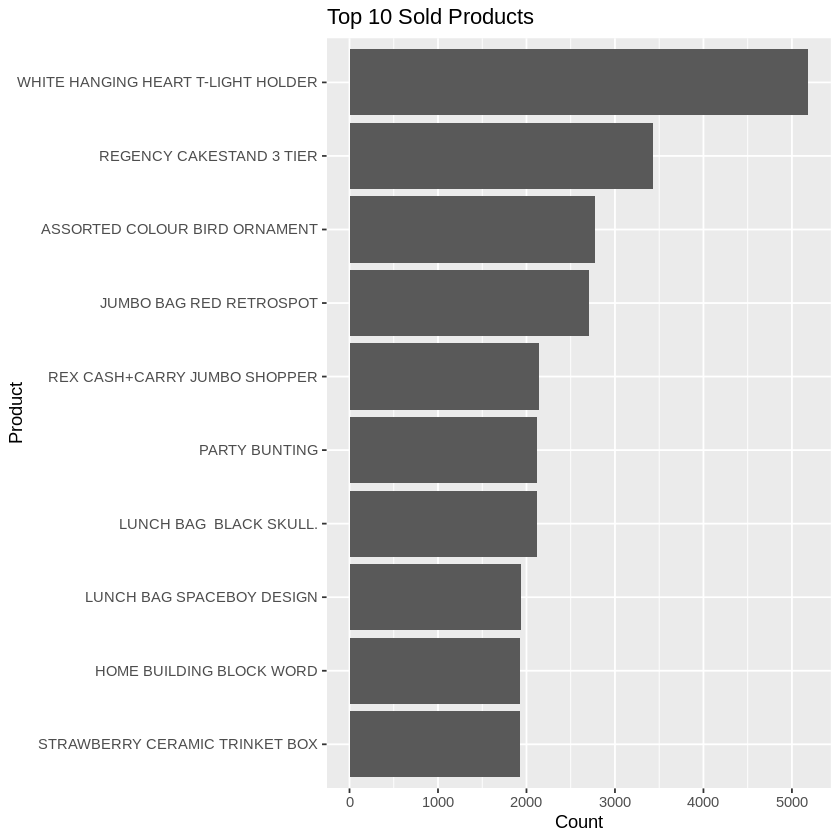

In [ ]:
#Ploting top 10 products
library(ggplot2)
ggplot(top_products,aes(x=reorder(Description,n),y=n)) + geom_bar(stat="identity") + coord_flip() +
   labs(title="Top 10 Sold Products",x="Product",y="Count")

**Step-4: Market Basket Analysis**

Apriori Algorithm

In [ ]:
rules_apriori_ii=apriori(transcations_list_ii,parameter=list(supp=0.001,conf=0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 11 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5111 item(s), 11936 transaction(s)] done [0.11s].
sorting and recoding items ... [3126 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(transcations_list_ii, parameter = list(supp = 0.001, :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.65s].
writing ... [278086 rule(s)] done [0.11s].
creating S4 object  ... done [0.09s].


In [ ]:
summary(rules_apriori_ii)

set of 278086 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5     6     7     8     9    10 
  278  8174 22602 39608 51795 54738 47719 34116 19056 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   7.000   6.785   8.000  10.000 

summary of quality measures:
    support           confidence        coverage             lift        
 Min.   :0.001005   Min.   :0.8000   Min.   :0.001005   Min.   :  6.005  
 1st Qu.:0.001005   1st Qu.:0.9231   1st Qu.:0.001005   1st Qu.: 29.567  
 Median :0.001089   Median :1.0000   Median :0.001089   Median : 44.044  
 Mean   :0.001128   Mean   :0.9530   Mean   :0.001194   Mean   : 80.167  
 3rd Qu.:0.001089   3rd Qu.:1.0000   3rd Qu.:0.001173   3rd Qu.:107.531  
 Max.   :0.017259   Max.   :1.0000   Max.   :0.020023   Max.   :994.667  
     count       
 Min.   : 12.00  
 1st Qu.: 12.00  
 Median : 13.00  
 Mean   : 13.46  
 3rd Qu.: 13.00  
 Max.   :206.00  

mining info:
                 data ntransactions sup

In [ ]:
inspect(head(sort(rules_apriori_ii,by="lift"),10))

     lhs                        rhs                     support     confidence
[1]  { BRASSERIE DES ARTIST} => {FRENCH BOTTLE}         0.001005362 1         
[2]  {FRENCH BOTTLE}         => { BRASSERIE DES ARTIST} 0.001005362 1         
[3]  {S/4 ICON COASTER}      => {ELVIS LIVES}           0.001005362 1         
[4]  {ELVIS LIVES}           => {S/4 ICON COASTER}      0.001005362 1         
[5]  { XMAS SOCK/BAUBLE}     => {RIBBON REEL}           0.001089142 1         
[6]  {RIBBON REEL}           => { XMAS SOCK/BAUBLE}     0.001089142 1         
[7]  { 1,  7}                => { 6}                    0.001005362 1         
[8]  { 2,  7}                => { 6}                    0.001005362 1         
[9]  { 0,  1}                => { 6}                    0.001005362 1         
[10] { 0,  2}                => { 6}                    0.001005362 1         
     coverage    lift     count
[1]  0.001005362 994.6667 12   
[2]  0.001005362 994.6667 12   
[3]  0.001005362 994.6667 12   
[4]

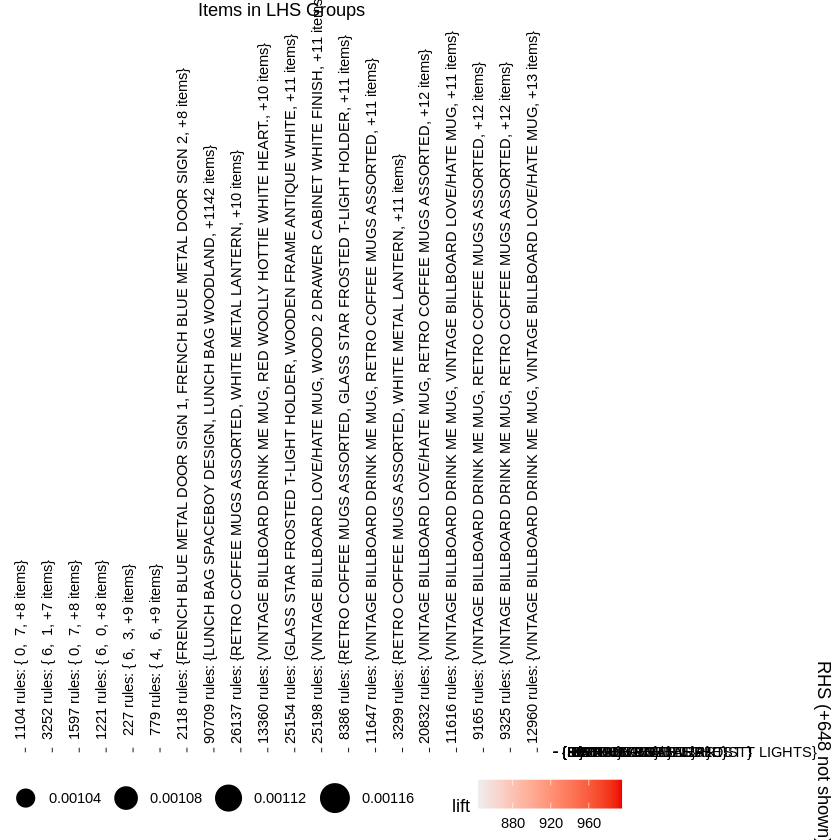

In [ ]:
plot(rules_apriori_ii,method="grouped")

ECLAT Algorithm

In [ ]:
frequent_items_eclat_ii=eclat(transcations_list_ii,parameter=list(supp=0.001,maxlen=10))

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE   0.001      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 11 

create itemset ... 
set transactions ...[5111 item(s), 11936 transaction(s)] done [0.14s].
sorting and recoding items ... [3126 item(s)] done [0.01s].
creating sparse bit matrix ... [3126 row(s), 11936 column(s)] done [0.01s].
writing  ... [157877 set(s)] done [2.89s].
Creating S4 object  ... done [0.02s].


In [ ]:
rules_eclat_ii=ruleInduction(frequent_items_eclat_ii,transcations_list_ii,confidence=0.8)

In [ ]:
summary(rules_eclat_ii)

set of 278086 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5     6     7     8     9    10 
  278  8174 22602 39608 51795 54738 47719 34116 19056 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   7.000   6.785   8.000  10.000 

summary of quality measures:
    support           confidence          lift            itemset      
 Min.   :0.001005   Min.   :0.8000   Min.   :  6.005   Min.   :     1  
 1st Qu.:0.001005   1st Qu.:0.9231   1st Qu.: 29.567   1st Qu.: 18103  
 Median :0.001089   Median :1.0000   Median : 44.044   Median : 29856  
 Mean   :0.001128   Mean   :0.9530   Mean   : 80.167   Mean   : 41527  
 3rd Qu.:0.001089   3rd Qu.:1.0000   3rd Qu.:107.531   3rd Qu.: 54190  
 Max.   :0.017259   Max.   :1.0000   Max.   :994.667   Max.   :154450  

mining info:
                 data ntransactions support
 transcations_list_ii         11936   0.001
                                                                            call
 eclat(dat

In [ ]:
inspect(head(sort(rules_eclat_ii,by="lift"),10))

     lhs                              rhs                         support confidence     lift itemset
[1]  {FRENCH BOTTLE}               => { BRASSERIE DES ARTIST} 0.001005362          1 994.6667       6
[2]  { BRASSERIE DES ARTIST}       => {FRENCH BOTTLE}         0.001005362          1 994.6667       6
[3]  {S/4 ICON COASTER}            => {ELVIS LIVES}           0.001005362          1 994.6667    1621
[4]  {ELVIS LIVES}                 => {S/4 ICON COASTER}      0.001005362          1 994.6667    1621
[5]  {RIBBON REEL}                 => { XMAS SOCK/BAUBLE}     0.001089142          1 918.1538       7
[6]  { XMAS SOCK/BAUBLE}           => {RIBBON REEL}           0.001089142          1 918.1538       7
[7]  { 1,                                                                                            
       2,                                                                                            
       3,                                                                         

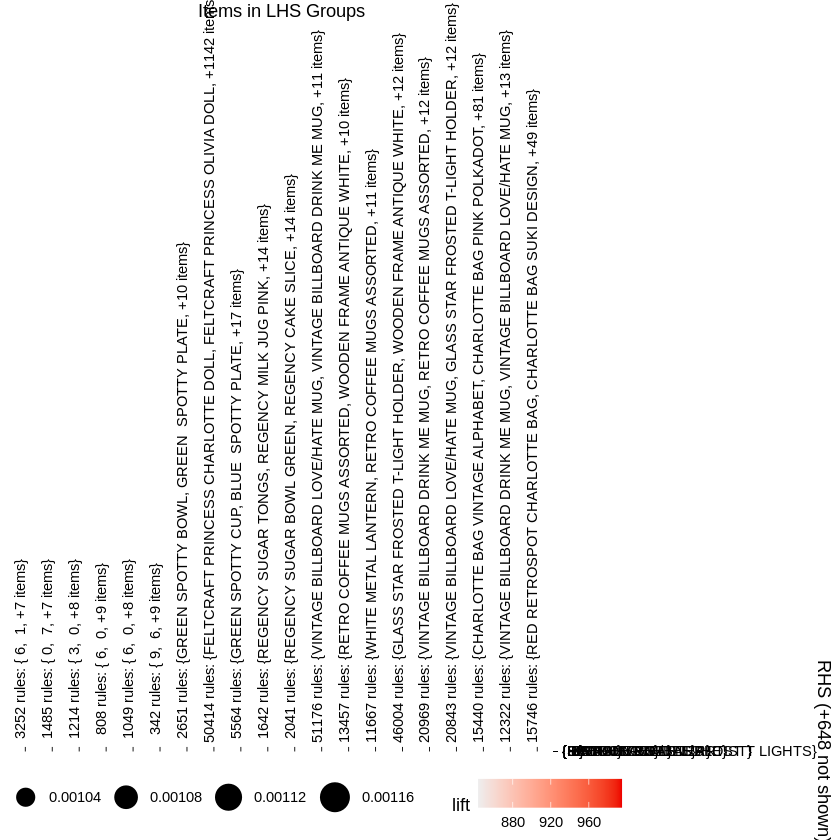

In [ ]:
plot(rules_eclat_ii,method="grouped")

**Step-5: Algorithm Comparision**

In [ ]:
num_rules_ii=c(length(rules_apriori_ii),length(rules_eclat_ii))
avg_support_ii=c(mean(quality(rules_apriori_ii)$support),mean(quality(rules_eclat_ii)$support))
avg_confidence_ii=c(mean(quality(rules_apriori_ii)$confidence),mean(quality(rules_eclat_ii)$confidence))

In [ ]:
comparision_ii=data.frame(Algorithm=c("Apriori","ECLAT"),NUM_Rules=num_rules_ii,Avg_Support=avg_support_ii,Avg_Confidence=avg_confidence_ii)

In [ ]:
print(comparision_ii)

  Algorithm NUM_Rules Avg_Support Avg_Confidence
1   Apriori    278086 0.001127643      0.9529579
2     ECLAT    278086 0.001127643      0.9529579


**Step-6:Business Insights**

1) **Top Selling Products:-**


*   The top 10 sold products are dominated by unique and gift-worthy items, such as the "WHITE HANGING HEART T-LIGHT HOLDER" and "REGENCY CAKESTAND 3 TIER".
*   This indicates a strong consumer preference for decorative and functional items that can serve as gifts or personal purchases for home decor.

2) **Frequent Itemsets:-**


*   Using the Apriori algorithm, itemsets such as "BRASSERIE DES ARTIST" paired with "FRENCH BOTTLE" and "ELVIS LIVES" paired with "5/4 ICON COASTER" show a high confidence level of 1, suggesting these items are often bought together.
*   The ECLAT algorithm supports similar findings, reinforcing the reliability of these itemsets.

3) **Association Rules:-**


*   High lift values for rules like "{FRENCH BLUE METAL DOOR SIGN} => {6}" indicate strong associations between these products, suggesting cross-selling opportunities.
*   Both algorithms highlight that items with thematic or complementory uses are frequently bought together, such as decor items and related accessories.

4) **Algorithm Performance:-**


*   Both Apriori and ECLAT algorithms produced a substantial number of rules with high average support and confidence values.
*   The ECLAT algorithm, while producing the same number of rules as Apriori algorithm, has a slightly higher average confidence, indicating marginally better performance in terms of rule strength.

**Step-7:Conclusion**

1) **Consumer Behaviour Insights:-**


*   The analysis reveals that customers often purchase complementory products together, especially items used for home decor or as gifts. This insight can help the company optimize product placement and bundling strategies.

2) **Strategic Recommendations:-**


*   ***Product Bundling:*** Create special offers and discounts on bundles of frequently bought together items, like the "BRASSERIE DES ARTIST" and "FRENCH BOTTLE".
*   ***Cross-Promotions:*** Implement cross-promotional strategies that highlight complementary products to boost sales.

*   ***Inventory Management:*** Focus on maintaining adequate stock levels for top-selling and frequently associated items to meet customer demand and prevent stockouts.

3) **Algorithm Comparision:-**


*   Both Apriori and ECLAT algorithms are effective in identifying strong association rules. However, ECLAT's slightly higher average confidence suggests it might be better suited for this dataset in terms of predicting strong item associations.

4) **Future Work:-**


*   Consider exploring additional algorithm like FP-growth for further optimization.
*   Extend the analysis to include seasonal trends and customer segmentation for more tailored marketing strategies.